In [56]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [57]:
auth = tweepy.OAuth1UserHandler(
   "IydvddCLoviUsFvmEMgbvxHur","3RVnQ977LURoEBsTXleL01uVDm941rL378z8U5vL27Kiew5ari",
    "854665854239121408-xMT3dGurbrRvRXUezSiTEDbjHLiKDJ7",
    'S57KiHV8gQaTJTwRqyGEhCqcSV5sqsht1KhUonjuwYVOa'
)

api = tweepy.API(auth)

In [58]:
def percentage(part,whole):
 return 100 * float(part)/float(whole)

In [59]:
topic=input(('Enter the Trending topic You want to search for'))
n = int(input('Enter the tweets to retrive'))
tweet_list = []
positive_list = []
neg_list = []
neu_list = []
positive1 = 0
negative1 = 0
neutral1 = 0
polarity1 = 0
df = pd.read_csv('test.csv')
tweets = df['tweet']
for i in range(1) :
    for tweet in tweets:
        tweet_list.append(tweet)
        analysis = TextBlob(tweet)
        score = SentimentIntensityAnalyzer().polarity_scores(tweet)
        neg = score['neg']
        neu = score['neu']
        pos = score['pos']
        comp = score['compound']
        polarity1 += analysis.sentiment.polarity
        if neg > pos:
            neg_list.append(tweet)
            negative1 = negative1 +1 
        elif pos > neg:
            positive_list.append(tweet)
            positive1 = positive1 + 1
        elif pos == neg:
            neu_list.append(tweet)
            neutral1 = neutral1 +1
positive = percentage(positive1, 17198)
negative = percentage(negative1, 17198)
neutral = percentage(neutral1, 17198)
polarity = percentage(polarity1, 17198)
positive = format(positive, '.1f')
negative= format(negative, '.1f')
neutral = format(neutral, '.1f')


Enter the Trending topic You want to search forHello
Enter the tweets to retrive1


In [60]:
tweet_list = pd.DataFrame(tweet_list)
neu_list = pd.DataFrame(neu_list)
neg_list = pd.DataFrame(neg_list)
positive_list = pd.DataFrame(positive_list)
print("total number :",len(tweet_list))
print("positive number :" ,len(positive_list))
print("negative number :" , len(neg_list))
print("neutral number :" ,len(neu_list))


total number : 17197
positive number : 7198
negative number : 3228
neutral number : 6771


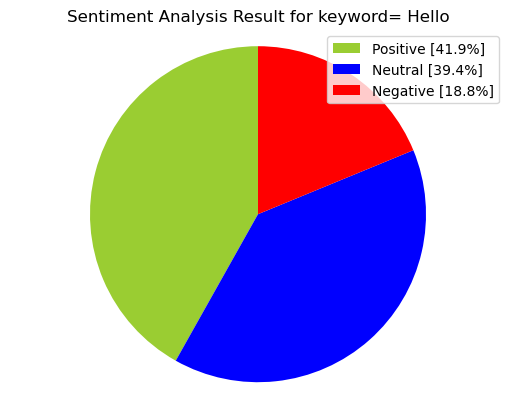

In [61]:
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+topic+"" )
plt.axis('equal')
plt.show()

In [62]:
try :
    tweet_list.drop_duplicates(inplace = True)
except :
    print('No Duplicates Found')

In [63]:
tw_list = pd.DataFrame(tweet_list)
tw_list['text'] = tw_list[0]
remove_rt = lambda x: re.sub('RT @\w+: ', '', x)
rt = lambda x: re.sub('(@[A-Za-z0-9_]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)', '', x)
# Apply the text cleaning functions
tw_list['text'] = tw_list['text'].apply(remove_rt).apply(rt)
tw_list['text'] = tw_list['text'].str.lower()

# Display the cleaned DataFrame
tw_list.head(10)

,0,text
0,#studiolife #aislife #requires #passion #dedic...,studiolife aislife requires passion dedication...
1,@user #white #supremacists want everyone to s...,white supremacists want everyone to see the ...
2,safe ways to heal your #acne!! #altwaystohe...,safe ways to heal your acne altwaystoheal h...
3,is the hp and the cursed child book up for res...,is the hp and the cursed child book up for res...
4,"3rd #bihday to my amazing, hilarious #nephew...",3rd bihday to my amazing hilarious nephew el...
5,choose to be :) #momtips,choose to be momtips
6,something inside me dies ð¦ð¿â¨ eyes nes...,something inside me dies eyes ness smokeyeye...
7,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...,finishedtattooinkedinkloveit thanksaleeee
8,@user @user @user i will never understand why...,i will never understand why my dad left me...
9,#delicious #food #lovelife #capetown mannaep...,delicious food lovelife capetown mannaepicur...


In [64]:
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: 
                                                              pd.Series(TextBlob(Text).
                                                                        sentiment))
for index, row in tw_list['text'].items():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
         tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp
tw_list

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,#studiolife #aislife #requires #passion #dedic...,studiolife aislife requires passion dedication...,0.000000,0.000000,positive,0.000,0.727,0.273,0.4588
1,@user #white #supremacists want everyone to s...,white supremacists want everyone to see the ...,0.068182,0.227273,negative,0.140,0.769,0.091,-0.1779
2,safe ways to heal your #acne!! #altwaystohe...,safe ways to heal your acne altwaystoheal h...,0.500000,0.500000,positive,0.000,0.556,0.444,0.6808
3,is the hp and the cursed child book up for res...,is the hp and the cursed child book up for res...,0.500000,1.000000,positive,0.085,0.695,0.220,0.5423
4,"3rd #bihday to my amazing, hilarious #nephew...",3rd bihday to my amazing hilarious nephew el...,0.366667,0.633333,positive,0.082,0.476,0.442,0.8519
...,...,...,...,...,...,...,...,...,...
17191,2_damn_tuff-ruff_muff__techno_city-(ng005)-web...,2damntuffruffmufftechnocityng005web1997ukhxint...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
17192,thought factory: left-right polarisation! #tru...,thought factory leftright polarisation trump u...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
17193,feeling like a mermaid ð #hairflip #neverre...,feeling like a mermaid hairflip neverready fo...,0.000000,0.000000,positive,0.000,0.667,0.333,0.4588
17194,#hillary #campaigned today in #ohio((omg)) &am...,hillary campaigned today in ohioomg amp used w...,0.000000,0.000000,positive,0.000,0.865,0.135,0.3612


In [65]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list['sentiment']=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list['sentiment']=="neutral"]

In [66]:
def count_values_in_column(data,feature):
    
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
positive,8166,50.63
neutral,4482,27.79
negative,3482,21.59


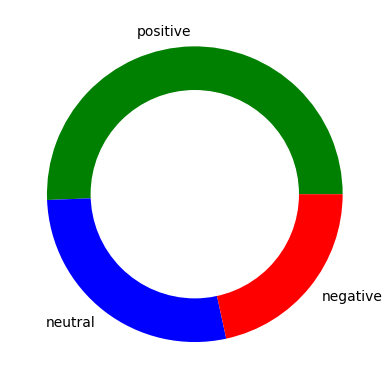

In [67]:
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]

my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [68]:
def create_wordcloud(text):
 mask = np.array(Image.open("cloud.png"))
 stopwords = set(STOPWORDS)
 wc = WordCloud(background_color="white",
 mask = mask,
 max_words=3000,
 stopwords=stopwords,
 repeat=True)
 wc.generate(str(text))
 wc.to_file("wc.png")
 print("Word Cloud Saved Successfully")
 path="wc.png"
 display(Image.open(path))

Word Cloud Saved Successfully


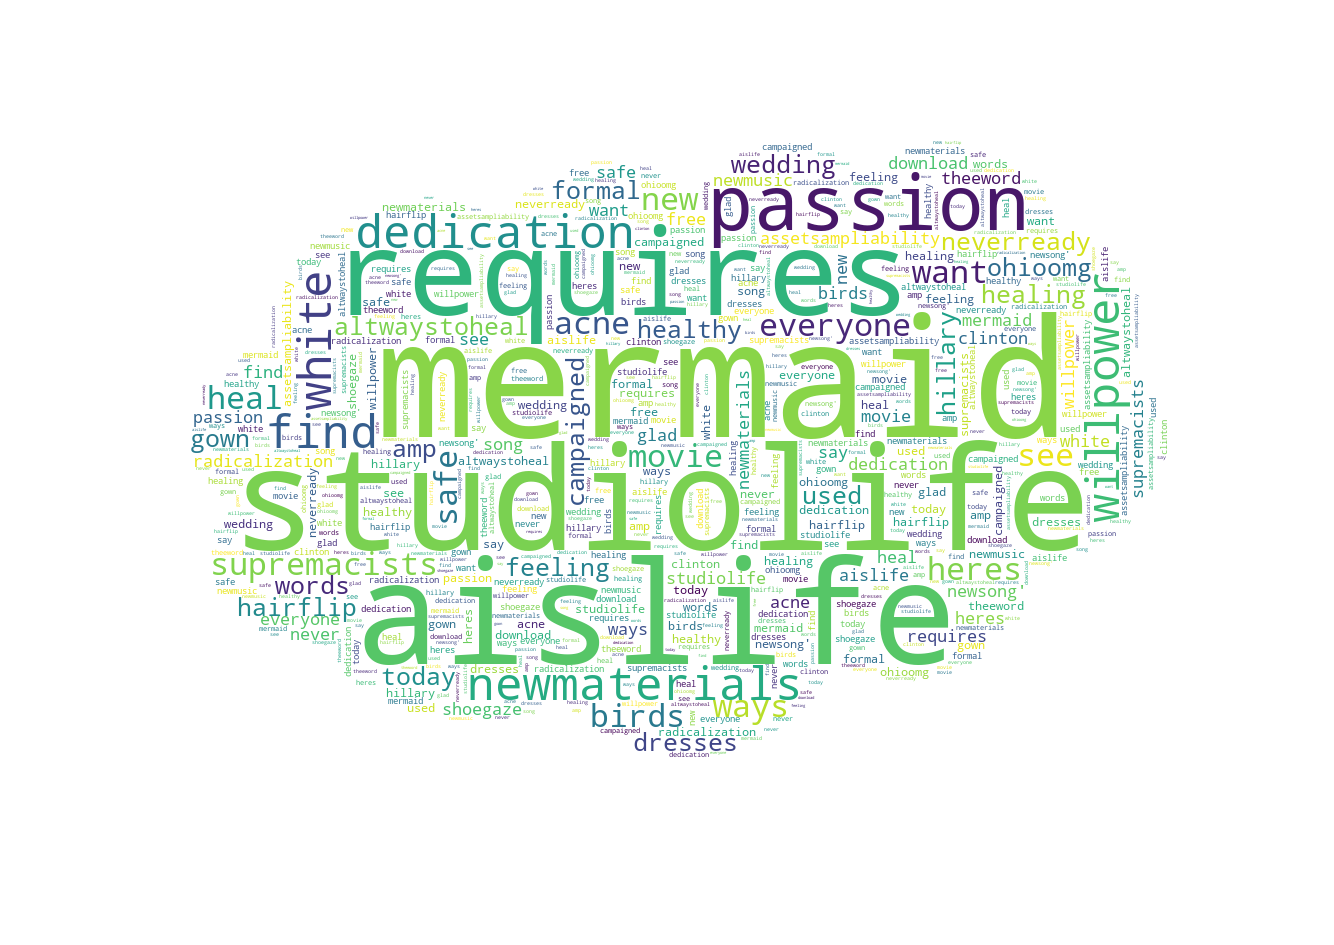

In [69]:
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


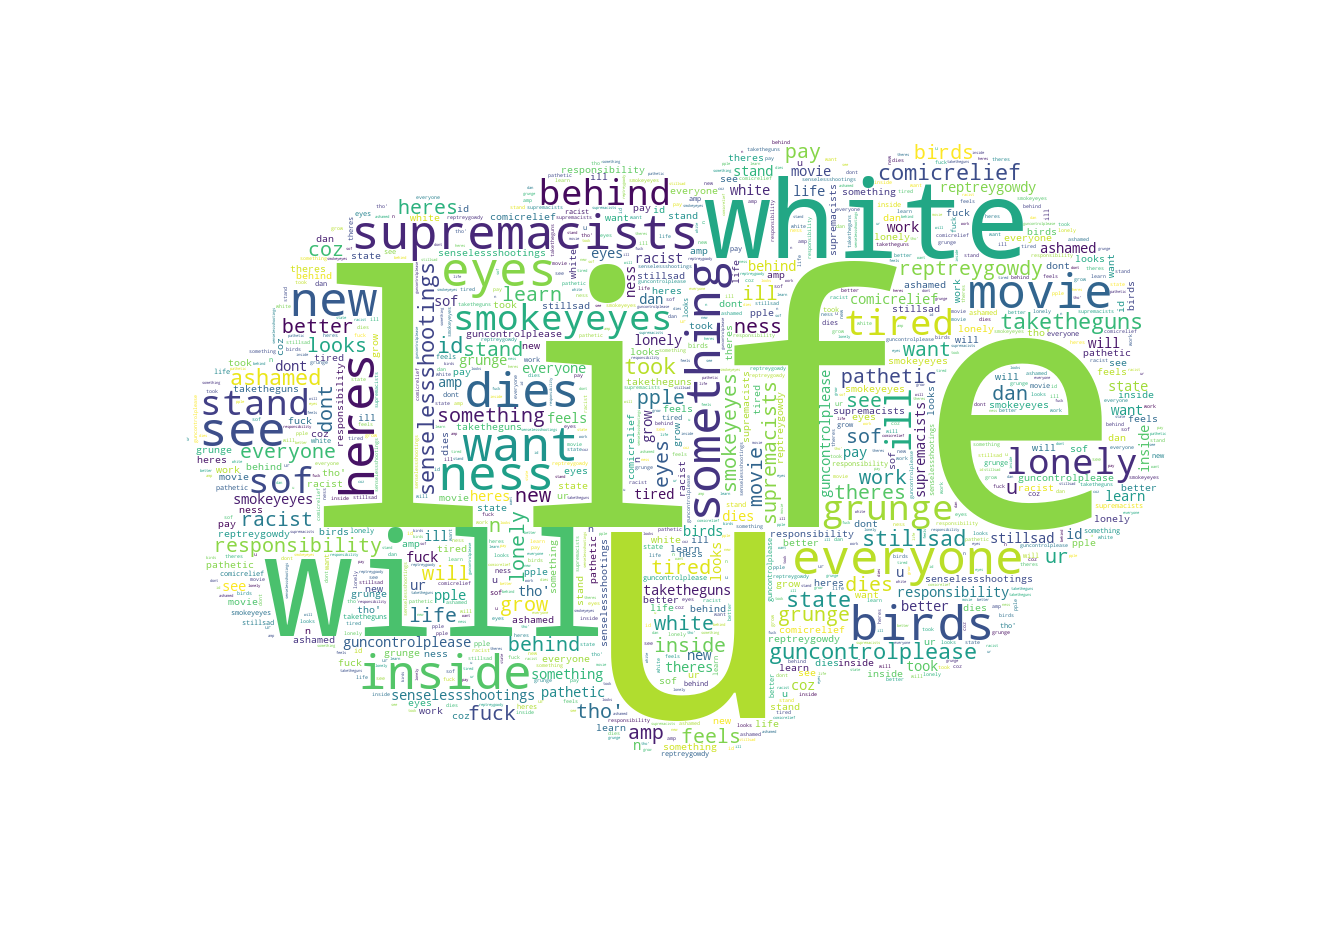

In [70]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

In [71]:
#Calculating tweet’s lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,85.21
neutral,62.28
positive,76.02


In [72]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,14.55
neutral,9.86
positive,12.33


In [73]:
#Removing Punctuation
def remove_punct(text):
 text = "".join([char for char in text if char not in string.punctuation])
 text = re.sub('[0–9]+', '', text)
 return text
tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text
tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))
#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text
tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,#studiolife #aislife #requires #passion #dedic...,studiolife aislife requires passion dedication...,0.000000,0.000000,positive,0.000,0.727,0.273,0.4588,80,9,studiolife aislife requires passion dedication...,"[studiolife, aislife, requires, passion, dedic...","[studiolife, aislife, requires, passion, dedic...","[studiolif, aislif, requir, passion, dedic, wi..."
1,@user #white #supremacists want everyone to s...,white supremacists want everyone to see the ...,0.068182,0.227273,negative,0.140,0.769,0.091,-0.1779,80,13,white supremacists want everyone to see the ...,"[, white, supremacists, want, everyone, to, se...","[, white, supremacists, want, everyone, see, n...","[, white, supremacist, want, everyon, see, new..."
2,safe ways to heal your #acne!! #altwaystohe...,safe ways to heal your acne altwaystoheal h...,0.500000,0.500000,positive,0.000,0.556,0.444,0.6808,63,9,safe ways to heal your acne altwaystoheal h...,"[safe, ways, to, heal, your, acne, altwaystohe...","[safe, ways, heal, acne, altwaystoheal, health...","[safe, way, heal, acn, altwaystoh, healthi, he..."
3,is the hp and the cursed child book up for res...,is the hp and the cursed child book up for res...,0.500000,1.000000,positive,0.085,0.695,0.220,0.5423,122,21,is the hp and the cursed child book up for res...,"[is, the, hp, and, the, cursed, child, book, u...","[hp, cursed, child, book, reservations, alread...","[hp, curs, child, book, reserv, alreadi, ye, h..."
4,"3rd #bihday to my amazing, hilarious #nephew...",3rd bihday to my amazing hilarious nephew el...,0.366667,0.633333,positive,0.082,0.476,0.442,0.8519,86,15,3rd bihday to my amazing hilarious nephew el...,"[, 3rd, bihday, to, my, amazing, hilarious, ne...","[, 3rd, bihday, amazing, hilarious, nephew, el...","[, 3rd, bihday, amaz, hilari, nephew, eli, ahm..."
5,choose to be :) #momtips,choose to be momtips,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,24,4,choose to be momtips,"[choose, to, be, momtips, ]","[choose, momtips, ]","[choos, momtip, ]"
6,something inside me dies ð¦ð¿â¨ eyes nes...,something inside me dies eyes ness smokeyeye...,-0.250000,0.700000,negative,0.375,0.625,0.000,-0.6597,73,11,something inside me dies eyes ness smokeyeye...,"[something, inside, me, dies, eyes, ness, smok...","[something, inside, dies, eyes, ness, smokeyey...","[someth, insid, die, eye, ness, smokeyey, tire..."
7,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...,finishedtattooinkedinkloveit thanksaleeee,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,44,2,finishedtattooinkedinkloveit thanksaleeee,"[finishedtattooinkedinkloveit, thanksaleeee, ]","[finishedtattooinkedinkloveit, thanksaleeee, ]","[finishedtattooinkedinkloveit, thanksaleee, ]"
8,@user @user @user i will never understand why...,i will never understand why my dad left me...,0.033333,0.266667,neutral,0.000,1.000,0.000,0.0000,85,16,i will never understand why my dad left me...,"[, i, will, never, understand, why, my, dad, l...","[, never, understand, dad, left, young, deep, ...","[, never, understand, dad, left, young, deep, ..."
9,#delicious #food #lovelife #capetown mannaep...,delicious food lovelife capetown mannaepicur...,1.000000,1.000000,positive,0.000,0.575,0.425,0.5719,58,6,delicious food lovelife capetown mannaepicur...,"[delicious, food, lovelife, capetown, mannaepi...","[delicious, food, lovelife, capetown, mannaepi...","[delici, food, lovelif, capetown, mannaepicur,..."


In [74]:
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))

16130 Number of reviews has 22412 words


In [75]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names_out())
count_vect_df.head()

,,aa,aaaahhh,aaaahhhh,aaaannndd,aaahhhh,aaarat,aadmi,aah,aaj,...,zsanet,zsassoci,zshq,zueiraneverend,zuidholland,zukilloyzukilla,zuksampseez,zumba,zurenborg,zurvita
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
love,1480
day,1415
happi,1108
amp,782
thank,658
get,639
im,580
life,579
today,563
go,560


In [77]:
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [41]:
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('fathers day', 344),
 ('blog silver', 144),
 ('thankful positive', 138),
 ('silver gold', 137),
 ('gold forex', 129),
 ('positive affirmation', 116),
 ('happy fathers', 101),
 ('iam positive', 96),
 ('good morning', 75),
 ('polar bear', 75),
 ('looking forward', 62),
 ('happy bihday', 58),
 ('bull dominate', 50),
 ('dominate bull', 50),
 ('bull direct', 50),
 ('direct want', 50),
 ('bear climb', 50),
 ('climb racing', 50),
 ('dont know', 46),
 ('just got', 44)]

In [78]:
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('blog silver gold', 137),
 ('silver gold forex', 129),
 ('happy fathers day', 99),
 ('iam positive affirmation', 96),
 ('bull dominate bull', 50),
 ('dominate bull direct', 50),
 ('bull direct want', 50),
 ('polar bear climb', 50),
 ('bear climb racing', 50),
 ('gorilla simulator need', 40),
 ('simulator need adapt', 40),
 ('need adapt environment', 40),
 ('adapt environment need', 40),
 ('environment need tear', 40),
 ('need tear city', 37),
 ('fathers day fathers', 26),
 ('cute beautiful followme', 26),
 ('love instagood photooftheday', 25),
 ('tbt cute beautiful', 25),
 ('climb racing angry', 25)]